In [15]:
import pandas as pd

In [16]:
health_df = pd.read_csv("health_data.csv", encoding="ISO-8859-1")
df = pd.read_csv("city_poverty.csv", encoding="ISO-8859-1")


In [33]:
df_small = df[["GEO.display-label","HC04_EST_VC01", "HC01_EST_VC26"]]
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
    'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
    'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
    'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
    'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
    'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
    'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
    'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY','Puerto Rico': 'PR',
    'District of Columbia': 'DC'
}
df_small = df_small.drop([0])
df_small.head()
df_small["city"] = ""
df_small["state"] = ""
df_small.head()
stop_words = ["city", "municipality", "CDP", "town", "unified government (balance)" ,"consolidated government (balance)",
        "village", "metro government (balance)", "metropolitan government (balance)", "zona urbana", "(balance)"]
for df_index, df_row in df_small.iterrows():
        item = df_row["GEO.display-label"]
        state = item.split(",")[-1].strip()
        state_abbr = us_state_abbrev[state]
        string = df_row["GEO.display-label"]
        city_state = item.split(",")[0]
        city = ' '.join([word for word in city_state.split() if word not in stop_words])
        df_row["city"] = city
        df_row["state"] = us_state_abbrev[state]
df_small["city"].replace("Athens-Clarke County unified government", "Athens", inplace=True)
df_small["city"].replace("Augusta-Richmond County consolidated government", "Augusta", inplace=True)
df_small["city"].replace("Macon-Bibb County", "Macon", inplace=True)
df_small["city"].replace("Macon-Bibb County", "Macon", inplace=True)
df_small["city"].replace("Urban Honolulu", "Honolulu", inplace=True)
df_small["city"].replace("Urban Honolulu", "Honolulu", inplace=True)
df_small["city"].replace("Lexington-Fayette urban county", "Lexington", inplace=True)
df_small["city"].replace("Louisville/Jefferson County metro government", "Louisville", inplace=True)
df_small["city"].replace("Nashville-Davidson metropolitan government", "Nashville", inplace=True)
df_small["city"].replace("Louisville/Jefferson County metro government", "Louisville", inplace=True)
df_small["city"].replace("Louisville/Jefferson County metro government", "Louisville", inplace=True)
new_df = pd.merge(df_small, health_df,  how='inner', left_on=['city','state'], right_on = ['PlaceName','StateAbbr'])
new_df.head()

,GEO.display-label,HC04_EST_VC01,HC01_EST_VC26,city,state,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,"Birmingham city, Alabama",25.4,68383,Birmingham,AL,0,AL,Birmingham,107000,212237,...,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)",26.1,"(25.1, 27.2)",25.9,"(25.0, 26.9)",33.52756637730 -86.7988174678
1,"Hoover city, Alabama",5.6,30290,Hoover,AL,1,AL,Hoover,135896,81619,...,"(34.2, 35.0)",2.3,"( 2.2, 2.3)",2.2,"( 2.1, 2.3)",9.6,"( 8.6, 10.8)",9.5,"( 8.5, 10.9)",33.37676027290 -86.8051937568
2,"Huntsville city, Alabama",12.8,67417,Huntsville,AL,2,AL,Huntsville,137000,180105,...,"(39.4, 40.0)",3.3,"( 3.3, 3.4)",3.2,"( 3.1, 3.2)",14.9,"(14.1, 15.7)",14.7,"(13.8, 15.5)",34.69896926710 -86.6387042882
3,"Mobile city, Alabama",19.5,62948,Mobile,AL,3,AL,Mobile,150000,195111,...,"(42.0, 42.4)",4.3,"( 4.3, 4.4)",4.1,"( 4.0, 4.1)",24.3,"(23.4, 25.3)",24.1,"(23.1, 25.0)",30.67762486480 -88.1184482714
4,"Montgomery city, Alabama",20.9,65565,Montgomery,AL,4,AL,Montgomery,151000,205764,...,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)",21.2,"(20.3, 22.2)",21.2,"(20.1, 22.2)",32.34726453330 -86.2677059552


In [18]:
new_df = new_df.rename(columns={'HC04_EST_VC01': '%onFoodStamps', 'HC01_EST_VC26': '#atOr_abovePoverty'})

In [19]:
new_df.head()

,GEO.display-label,%onFoodStamps,#atOr_abovePoverty,city,state,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,"Birmingham city, Alabama",25.4,68383,Birmingham,AL,0,AL,Birmingham,107000,212237,...,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)",26.1,"(25.1, 27.2)",25.9,"(25.0, 26.9)",33.52756637730 -86.7988174678
1,"Hoover city, Alabama",5.6,30290,Hoover,AL,1,AL,Hoover,135896,81619,...,"(34.2, 35.0)",2.3,"( 2.2, 2.3)",2.2,"( 2.1, 2.3)",9.6,"( 8.6, 10.8)",9.5,"( 8.5, 10.9)",33.37676027290 -86.8051937568
2,"Huntsville city, Alabama",12.8,67417,Huntsville,AL,2,AL,Huntsville,137000,180105,...,"(39.4, 40.0)",3.3,"( 3.3, 3.4)",3.2,"( 3.1, 3.2)",14.9,"(14.1, 15.7)",14.7,"(13.8, 15.5)",34.69896926710 -86.6387042882
3,"Mobile city, Alabama",19.5,62948,Mobile,AL,3,AL,Mobile,150000,195111,...,"(42.0, 42.4)",4.3,"( 4.3, 4.4)",4.1,"( 4.0, 4.1)",24.3,"(23.4, 25.3)",24.1,"(23.1, 25.0)",30.67762486480 -88.1184482714
4,"Montgomery city, Alabama",20.9,65565,Montgomery,AL,4,AL,Montgomery,151000,205764,...,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)",21.2,"(20.3, 22.2)",21.2,"(20.1, 22.2)",32.34726453330 -86.2677059552


In [20]:
new_df.to_csv("health_poverty.csv")

In [21]:
list(new_df.columns.values)

['GEO.display-label',
 '%onFoodStamps',
 '#atOr_abovePoverty',
 'city',
 'state',
 'Unnamed: 0',
 'StateAbbr',
 'PlaceName',
 'PlaceFIPS',
 'Population2010',
 'ACCESS2_CrudePrev',
 'ACCESS2_Crude95CI',
 'ACCESS2_AdjPrev',
 'ACCESS2_Adj95CI',
 'ARTHRITIS_CrudePrev',
 'ARTHRITIS_Crude95CI',
 'ARTHRITIS_AdjPrev',
 'ARTHRITIS_Adj95CI',
 'BINGE_CrudePrev',
 'BINGE_Crude95CI',
 'BINGE_AdjPrev',
 'BINGE_Adj95CI',
 'BPHIGH_CrudePrev',
 'BPHIGH_Crude95CI',
 'BPHIGH_AdjPrev',
 'BPHIGH_Adj95CI',
 'BPMED_CrudePrev',
 'BPMED_Crude95CI',
 'BPMED_AdjPrev',
 'BPMED_Adj95CI',
 'CANCER_CrudePrev',
 'CANCER_Crude95CI',
 'CANCER_AdjPrev',
 'CANCER_Adj95CI',
 'CASTHMA_CrudePrev',
 'CASTHMA_Crude95CI',
 'CASTHMA_AdjPrev',
 'CASTHMA_Adj95CI',
 'CHD_CrudePrev',
 'CHD_Crude95CI',
 'CHD_AdjPrev',
 'CHD_Adj95CI',
 'CHECKUP_CrudePrev',
 'CHECKUP_Crude95CI',
 'CHECKUP_AdjPrev',
 'CHECKUP_Adj95CI',
 'CHOLSCREEN_CrudePrev',
 'CHOLSCREEN_Crude95CI',
 'CHOLSCREEN_AdjPrev',
 'CHOLSCREEN_Adj95CI',
 'COLON_SCREEN_CrudePr

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Assign X (data) and y (target)

X = new_df[['BINGE_AdjPrev', 'BPHIGH_AdjPrev', 'PAPTEST_AdjPrev', 'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev', 'STROKE_AdjPrev', 'TEETHLOST_AdjPrev', 'COLON_SCREEN_AdjPrev', 'CANCER_AdjPrev', 'CHECKUP_AdjPrev', 'CHOLSCREEN_AdjPrev', 'CSMOKING_AdjPrev', 'DENTAL_AdjPrev', 'DIABETES_AdjPrev', 'HIGHCHOL_AdjPrev', 'KIDNEY_AdjPrev', 'LPA_AdjPrev', 'MAMMOUSE_AdjPrev', 'MHLTH_AdjPrev', 'OBESITY_AdjPrev', 'PHLTH_AdjPrev', 'SLEEP_AdjPrev']]
y = new_df["%onFoodStamps"].values.reshape(-1, 1)
print(X.shape, y.shape)

(497, 22) (497, 1)


In [24]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [27]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

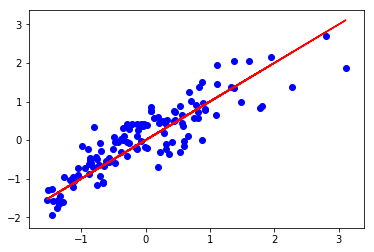

In [28]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions, c='blue')
plt.show()

In [29]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19928913283513416, R2: 0.7621845931417413


In [30]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19350087301916785, R2: 0.7690918305989592


In [31]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19925709986750878, R2: 0.7622228186742643


In [32]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19361492528030005, R2: 0.768955729927044
